In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To show plots inside the notebook
%matplotlib inline


In [3]:
# Load the dataset
df = pd.read_csv("../data/heart.csv")

# Display first 5 rows
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
# Shape of dataset
print("Shape:", df.shape)

# Info about columns
df.info()

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())


Shape: (1025, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB

Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        

In [5]:
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


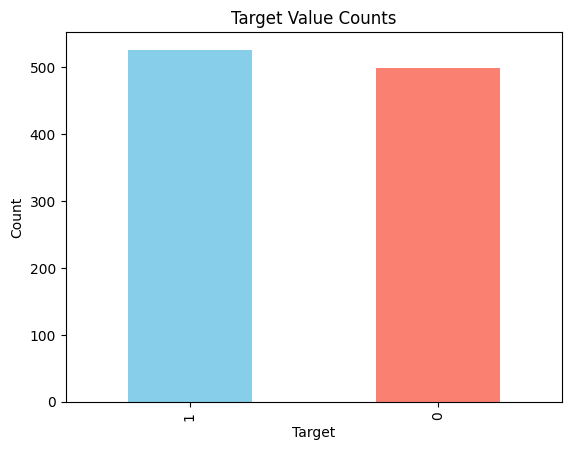

In [6]:
df['target'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Target Value Counts')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()


In [7]:
# Separate features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (1025, 13)
Shape of y: (1025,)


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)


Training set: (820, 13)
Testing set: (205, 13)


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
print("Before Scaling (first 5 rows):")
display(X_train.head())

print("\nAfter Scaling (first 5 rows):")
pd.DataFrame(X_train_scaled, columns=X_train.columns).head()


Before Scaling (first 5 rows):


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
688,56,0,0,200,288,1,0,133,1,4.0,0,2,3
477,57,1,2,128,229,0,0,150,0,0.4,1,1,3
336,57,1,2,150,126,1,1,173,0,0.2,2,1,3
960,52,0,2,136,196,0,0,169,0,0.1,1,0,2



After Scaling (first 5 rows):


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.811626,-1.509967,-0.909572,0.314729,0.895791,2.346899,0.926946,-1.921155,-0.718131,0.696525,-0.597542,2.207301,-0.562451
1,0.152247,-1.509967,-0.909572,3.767643,0.779115,2.346899,-0.982842,-0.725362,1.392504,2.475810,-2.198799,1.228400,1.090630
2,0.262144,0.662266,1.048037,-0.242193,-0.368191,-0.426094,-0.982842,0.027545,-0.718131,-0.574393,-0.597542,0.249500,1.090630
3,0.262144,0.662266,1.048037,0.983035,-2.371116,2.346899,0.926946,1.046184,-0.718131,-0.743849,1.003715,0.249500,1.090630
4,-0.287339,-1.509967,1.048037,0.203344,-1.009905,-0.426094,-0.982842,0.869030,-0.718131,-0.828577,-0.597542,-0.729400,-0.562451


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create and train the model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = log_reg.predict(X_test_scaled)

# Evaluate
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print("🔹 Logistic Regression Accuracy:", acc)
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", cr)
accuracy_lr = accuracy_score(y_test, y_pred)



🔹 Logistic Regression Accuracy: 0.8097560975609757

Confusion Matrix:
 [[70 30]
 [ 9 96]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.70      0.78       100
           1       0.76      0.91      0.83       105

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205



In [17]:
# Step 4.2 - Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train model
rf.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf.predict(X_test)

# Evaluate model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
accuracy_rf = accuracy_score(y_test, y_pred_rf)



Random Forest Accuracy: 1.0

Confusion Matrix:
 [[100   0]
 [  0 105]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



In [18]:
# Step 5 - Compare Models
models = {
    "Logistic Regression": accuracy_lr,
    "Random Forest": accuracy_rf
}

for name, acc in models.items():
    print(f"{name} Accuracy: {acc:.4f}")

# Check for overfitting
train_pred_rf = rf.predict(X_train)
train_acc_rf = accuracy_score(y_train, train_pred_rf)
print("\nRandom Forest Training Accuracy:", train_acc_rf)
print("Random Forest Testing Accuracy:", accuracy_rf)


Logistic Regression Accuracy: 0.8098
Random Forest Accuracy: 1.0000

Random Forest Training Accuracy: 1.0
Random Forest Testing Accuracy: 1.0


In [19]:
# Step 6 - Tune Random Forest to reduce overfitting

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

# Create a tuned Random Forest model
rf_tuned = RandomForestClassifier(
    n_estimators=100,      # number of trees
    max_depth=5,           # restrict tree depth to avoid memorizing
    min_samples_split=5,   # minimum samples needed to split a node
    random_state=42
)

# Train the tuned model
rf_tuned.fit(X_train, y_train)

# Test predictions
y_pred_tuned = rf_tuned.predict(X_test)

# Evaluate tuned model
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tuned))


Tuned Random Forest Accuracy: 0.9317073170731708

Confusion Matrix:
 [[ 89  11]
 [  3 102]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.89      0.93       100
           1       0.90      0.97      0.94       105

    accuracy                           0.93       205
   macro avg       0.94      0.93      0.93       205
weighted avg       0.93      0.93      0.93       205



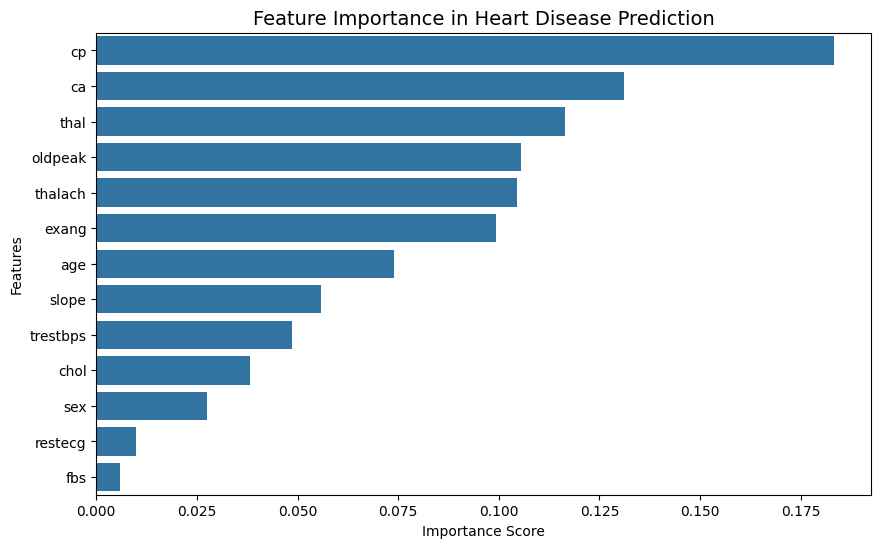

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
feature_importance = pd.Series(rf_tuned.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title("Feature Importance in Heart Disease Prediction", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


In [21]:
import pickle

# Save the tuned model
with open('heart_model.pkl', 'wb') as file:
    pickle.dump(rf_tuned, file)

print("✅ Model saved successfully as heart_model.pkl")


✅ Model saved successfully as heart_model.pkl
